# MODULE 5: PREPROCESSING YOUR DATA

    *************************************************************
    Author:  Adeyemi Adedoyin Simeon
    Program: MSc, Computer Science, University of Ibadan
    Course:  Machine Learning
    Date:    26th May, 2019
    Version: 1.2
    E-mail:  adeyemi.sa1@gmail.com
    *************************************************************
    
    *Note: Please reference the author whenever and wherever you use all/portion of this code*

## Importing Libraries

In [43]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Loading digits Dataset and describing the features of the dataset

In [3]:
digits = load_digits()

In [63]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [64]:
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [65]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [66]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [67]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
dataset = digits['data']
target = digits['target']
images = digits['images']

### Visualizing data using matplotlib with imshow() func for displaying images

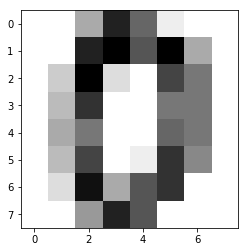

In [68]:
plt.imshow(images[0],cmap='gray_r')

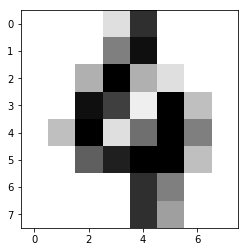

In [69]:
plt.imshow(images[100],cmap='gray_r')

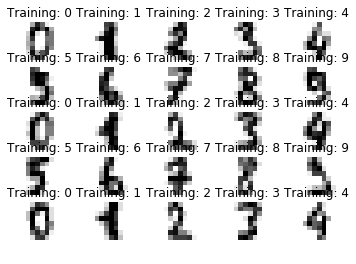

In [34]:
#plt.subplots(10,1)

for index,image in enumerate(images[:25]):
    plt.subplot(5,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap='gray_r',interpolation='nearest')
    plt.title('Training: ' + str(target[index]))
plt.show()

# Preprocessing Your Data

In [71]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [73]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
df = pd.DataFrame(dataset)

In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [102]:
#First Element (i.e.) image, [all columns][first row] 
df[:][0:1].values

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [103]:
#Reshape the first image to an 8 x 8 matrix
df[:][0:1].values.reshape((8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

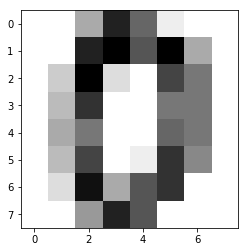

In [104]:
#Show the image represented by the 8 x 8 matrix pixel values.
#Each image is a digit handwriting style
plt.imshow(df[:][0:1].values.reshape((8,8)),cmap='gray_r')

# Normalization: Scaling data to have a mean of zero and standard deviation (unit variance)of one.

In [108]:
from sklearn.preprocessing import scale

In [109]:
scaled_data = scale(digits.data)

In [110]:
dataset

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [111]:
np.round(np.mean(scaled_data))

0.0

In [112]:
np.round(np.std(scaled_data))

1.0

In [113]:
X = scaled_data
y = target
z = images

# Splitting the data into Train Sample and Test Sample using train_test_split func from sklearn.cross_validation

In [114]:
from sklearn.cross_validation import  train_test_split

In [115]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X, y, z, test_size=0.25, random_state=42)


In [119]:
X_train

array([[ 0.        , -0.33501649, -0.67419451, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        ,  5.17802955,  2.2710018 , ..., -0.12952258,
        -0.26113572, -0.19600752],
       [ 0.        , -0.33501649, -0.25345218, ..., -0.80760583,
        -0.5056698 , -0.19600752],
       ...,
       [ 0.        , -0.33501649,  0.79840364, ...,  1.56568555,
        -0.01660165, -0.19600752],
       [ 0.        , -0.33501649, -0.88456568, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.88456568, ..., -0.97712664,
        -0.5056698 , -0.19600752]])

In [120]:
X_test

array([[ 0.        , -0.33501649, -1.09493684, ...,  1.22664392,
         0.71700059, -0.19600752],
       [ 0.        , -0.33501649,  1.21914597, ..., -0.97712664,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  0.58803248, ...,  0.20951905,
        -0.5056698 , -0.19600752],
       ...,
       [ 0.        ,  0.76759272,  1.6398883 , ...,  0.8876023 ,
         0.71700059, -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ..., -0.29904339,
        -0.5056698 , -0.19600752],
       [ 0.        ,  6.28063876,  2.2710018 , ..., -1.14664746,
        -0.5056698 , -0.19600752]])

In [121]:
y_train

array([5, 2, 0, ..., 2, 7, 1])

In [122]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

### More visualizations with matplotlib

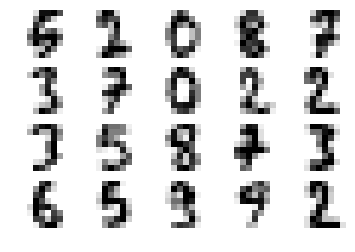

In [123]:
# Displaying the Training images
for index, image in enumerate(images_train[:20]):
    plt.subplot(4, 5, index+1)
    plt.imshow(image, cmap='gray_r',interpolation='nearest')
    plt.axis('off')
plt.show()

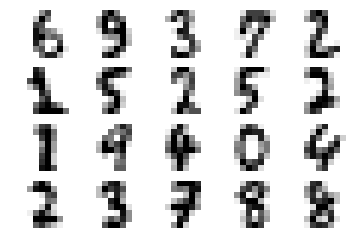

In [124]:
# Displaying the first 20 actual images corresponding to each digit's image of the test sample
for index, image in enumerate(images_test[:20]):
    plt.subplot(4, 5, index+1)
    plt.imshow(image, cmap='gray_r',interpolation='nearest')
    plt.axis('off')
plt.show()

In [125]:
# Displaying the first 20 actual values corresponding to each digit's image of the test sample
for index, itm in enumerate(y_test[:20]):
    print(index,'\t',itm)

0 	 6
1 	 9
2 	 3
3 	 7
4 	 2
5 	 1
6 	 5
7 	 2
8 	 5
9 	 2
10 	 1
11 	 9
12 	 4
13 	 0
14 	 4
15 	 2
16 	 3
17 	 7
18 	 8
19 	 8
